In [83]:
import pygrib
import numpy as np
from numpy import fft
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

In [84]:
#get gfs on 1degree lat/lon grid from NOMADS server in grib2 format
date = '20200812' # YYYYMMDD
modelRun = '00' # HH
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/

#specify forecast hour of file
forecastHour = '000' # HHH

#local path
path='C:/Users/johnh/OneDrive/Desktop/ATMOS_6010/GITHUB/ATMOS6010/data'
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour

#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-08-12 00:00:00 2020-08-12 00:00:00 0
surface 0 Visibility vis 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-08-12 00:00:00 2020-08-12 00:00:00 0
surface 0 Wind speed (gust) gust 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInPa 40 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
iso

isobaricInhPa 350 Vertical velocity w 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Absolute vorticity absv 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Cloud mixing ratio clwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 350 Ozone mixing ratio o3mr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 400 Geopotential Height gh 2020-08-12 00:00:00 2020-08-1

isobaricInhPa 800 Ice water mixing ratio icmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 800 Rain mixing ratio rwmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 800 Snow mixing ratio snmr 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 800 Graupel (snow pellets) grle 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 Relative humidity r 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 Total Cloud Cover tcc 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 Vertical velocity w 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 Geometric vertical velocity wz 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isobaricInhPa 850 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
isob

heightAboveGroundLayer 6000 U-component storm motion ustm 2020-08-12 00:00:00 2020-08-12 00:00:00 0
heightAboveGroundLayer 6000 V-component storm motion vstm 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Pressure pres 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 ICAO Standard Atmosphere reference height icaht 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Temperature t 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 U component of wind u 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 V component of wind v 2020-08-12 00:00:00 2020-08-12 00:00:00 0
tropopause 0 Vertical speed shear vwsh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
maxWind 0 Pressure pres 2020-08-12 00:00:00 2020-08-12 00:00:00 0
maxWind 0 ICAO Standard Atmosphere reference height icaht 2020-08-12 00:00:00 2020-08-12 00:00:00 0
maxWind 0 Geopotential Height gh 2020-08-12 00:00:00 2020-08-12 00:00:00 0
maxWi

In [85]:
# get 500 hPa geopotential height
h = grbs.select(shortName='gh',level=500)
# Extract all the values
h5_all = h[0].values
#what are the dimensions? note lat first, lon second
print(np.shape(h5_all))
# Get the lat/lon grids from the grib2 file
lats_all, lons_all = h[0].latlons()
grbs.close()


(181, 360)


In [86]:
#make the data more manageable in this case for a NH polar stereographic projection
#upper left corner lat/lon
ult = 90
uln = 0
#lower right corner lat/lon
rlt = 20
rln = 360
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays
h5 = h5_all[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]

#get hts along 40N
h40 = h5_all[90-40,ulni:rlni]
#print(h40)

In [87]:
#setup projection
#plot as polar stereographic
mapcrs = ccrs.NorthPolarStereo(central_longitude=-90)

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

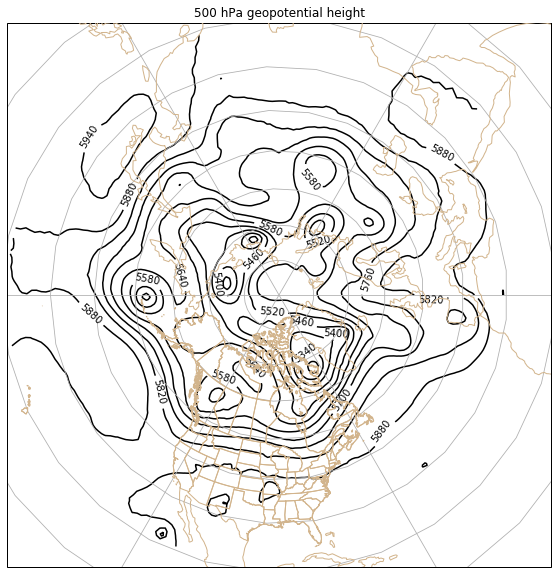

In [88]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': mapcrs})
# Plot height field
# select center contour interval, interval, and number of contours
cnt5 = 5580
int5 = 60
no5 = 12
lh5 = cnt5 - no5 * int5
up5 = cnt5 + no5 * int5
cs=ax.contour(lons,lats,h5,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
#cs1 = ax.contourf(lons,lats,h5,levels=range(lh5,up5,int5),cmap=rcol,transform=ccrs.PlateCarree())
#cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)

ax.set_title('500 hPa geopotential height')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('gfs_nh.png')
plt.show()

[ 2.11415369e+06 -2.89293983e+03  1.22374254e+03 -4.40301050e+02
 -3.65443187e+03  1.61517777e+03 -1.65698024e+03  1.45928767e+03
 -8.73584371e+02  1.13683594e+03]
[ 2.11415369e+06 -2.89293983e+03  1.22374254e+03 -4.40301050e+02
 -3.65443187e+03  1.61517777e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


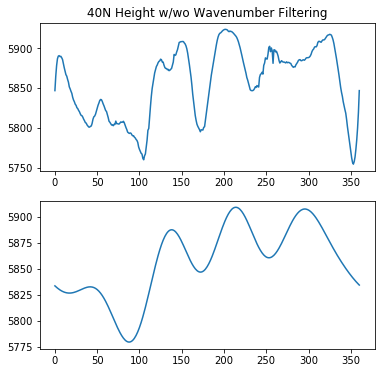

In [89]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6))
#append 0 lon to have periodic
h40 = np.append(h40,h40[0])
ax1.plot(h40)
#filter out high wavenumbers using FFT                      
Fk = fft.fft(h40) # Fourier coefficients
print(Fk[0:10].real)
#set cutoff wavenumber. allowing wavenumbers 0-6
cutoff = 6 
#zero out higher wavenumbers
Fk[cutoff:-(cutoff-1)] = 0
h40_low = fft.ifft(Fk).real
print(Fk[0:10].real)
ax2.plot(h40_low)   
ax1.set_title('40N Height w/wo Wavenumber Filtering')
plt.savefig('h40.png')
plt.show()

In [90]:
#Now do for all latitudes
h_low = np.empty_like(h5)
#cutoff is one more than wavenumbers to be retained
cutoff = 6
for lt in range(ulti,rlti):
    hl = h5[lt,:]
    #append 0 lon to have periodic
    hl = np.append(hl,hl[0])
    Fk = fft.fft(hl) # Fourier coefficients
    #zero out higher wavenumbers
    Fk[cutoff:-(cutoff-1)] = 0
    hl_low = fft.ifft(Fk).real
    h_low[lt,:] = hl_low[0:360]

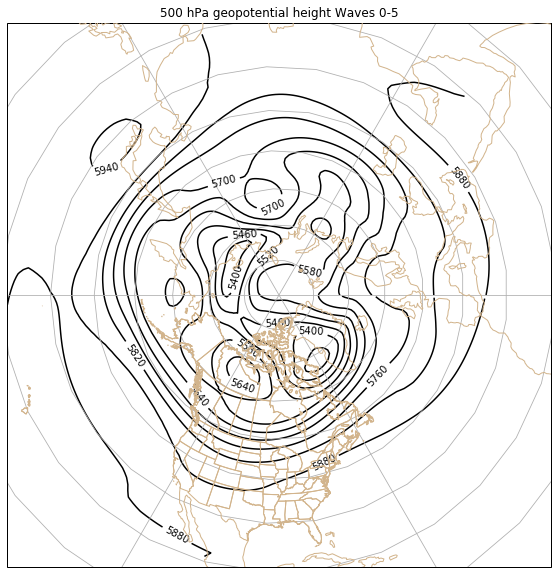

In [91]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': mapcrs})
# Plot low pass height field
cs=ax.contour(lons,lats,h_low,levels=range(lh5,up5,int5),transform=ccrs.PlateCarree(),colors='black')
plt.clabel(cs,fmt='%0.f',inline=True)

ax.set_title('500 hPa geopotential height Waves 0-5')
ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
plt.savefig('gfs_nh_waves05.png')
plt.show()